In [1]:
#Helper libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import os

#set pandas display width to allow for all columns to be viewed without centerwise truncation
pd.set_option('display.max_columns', None)

In [6]:
#Check for the dataset in the notebook's directory.  If it's not, then either move it there or point your instance at the proper
#directory
os.chdir('C:\\Users\\18174\\OneDrive - UNT System\\projectdata')
os.getcwd()

'C:\\Users\\18174\\OneDrive - UNT System\\projectdata'

In [7]:
churnDataFrame = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv',skipinitialspace=True)
churnDataFrame.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
churnDataFrame.mean()

SeniorCitizen        0.162147
tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2283.300441
dtype: float64

In [9]:
churnDataFrame.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [10]:
churnDataFrame["TotalCharges"] = churnDataFrame['TotalCharges'].fillna(value=0)

In [11]:
#impute 0's for the nulls
churnDataFrame['TotalCharges'] = churnDataFrame['TotalCharges'].fillna(value=0)

In [12]:
#validation for imputation 
churnDataFrame.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              0.0
Churn                                      No
Name: 488, dtype: object

In [13]:
# converts from object to float
churnDataFrame['TotalCharges'] = pd.to_numeric(churnDataFrame['TotalCharges'],errors='coerce')
churnDataFrame.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
# Impute TotalCharges null values with monthly charges
churnDataFrame['TotalCharges'].fillna(churnDataFrame['MonthlyCharges'],inplace=True)

In [15]:
#Pandas tells us the summary statistics for our numeric columns only
churnDataFrame.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
#Get unique values from each column
#This will help with feature engineering to let us see which columns should be converted to other datatypes
#Also, a count of unique values in each column will allow us to discern which columns should be one-hot encoded, where
#viable candidates for encoding have between 3 and 5 unique values

#Lists for column names. 
#OE == one-hot encoding candidates
#BC == Binary conversion candidates
#NR == No Recommendations
#BOOL == Column already binary, but needs data type change to bool
OEList = []
BCList = []
NRList = []
BOOLList = []

for column in churnDataFrame:
    print("Data type for " + column + ":")
    print(churnDataFrame.dtypes[column])
    print("Number of unique values: " + str(len(churnDataFrame[column].unique())))
    if len(churnDataFrame[column].unique()) > 5:
        print("Too many columns to recommend one-hot encoding.")
        NRList.append(column)
    elif (len(churnDataFrame[column].unique())) == 2:
        if churnDataFrame.dtypes[column] != 'int64':
            print("Candidate for binary variable conversion.")
            BCList.append(column)
        if churnDataFrame.dtypes[column] == 'int64':
            print("Candidate for binary variable conversion, but needs conversion to boolean.")
            BOOLList.append(column)
    elif len(churnDataFrame[column].unique()) > 2 & len(churnDataFrame[column].unique()) < 5:
        print("Candidate for one-hot encoding.")
        OEList.append(column)
    print("Unique values for " + column + ":")
    print(churnDataFrame[column].unique())
    print('Minimum value: ' + str(churnDataFrame[column].min()))
    print('Maximum value: ' + str(churnDataFrame[column].max()))
    print("\n")

Data type for customerID:
object
Number of unique values: 7043
Too many columns to recommend one-hot encoding.
Unique values for customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Minimum value: 0002-ORFBO
Maximum value: 9995-HOTOH


Data type for gender:
object
Number of unique values: 2
Candidate for binary variable conversion.
Unique values for gender:
['Female' 'Male']
Minimum value: Female
Maximum value: Male


Data type for SeniorCitizen:
int64
Number of unique values: 2
Candidate for binary variable conversion, but needs conversion to boolean.
Unique values for SeniorCitizen:
[0 1]
Minimum value: 0
Maximum value: 1


Data type for Partner:
object
Number of unique values: 2
Candidate for binary variable conversion.
Unique values for Partner:
['Yes' 'No']
Minimum value: No
Maximum value: Yes


Data type for Dependents:
object
Number of unique values: 2
Candidate for binary variable conversion.
Unique values for Dependents:
['No' 'Yes']

In [17]:
print("List of columns to convert to 0:1")
print(BCList)
print('\n')
print("List of columns to convert to boolean")
print(BOOLList)
print('\n')
print("Candidate list of columns to one-hot")
print(OEList)
print('\n')
print("List of columns that require further examination")
print(NRList)

List of columns to convert to 0:1
['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


List of columns to convert to boolean
['SeniorCitizen']


Candidate list of columns to one-hot
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


List of columns that require further examination
['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [18]:
# for column in BCList:
#     print(column)
#     print(churnDataFrame[column].unique())
#     print('\n')

In [19]:
#Feature conversion
#These conversions make for less meaningful exploratory and visual analyses
#The purpose of the constructed dataset is for computational efficiency within the model only

#Create a copy of the OG data "GANGSTA!"
modelDF = churnDataFrame.copy(deep=True)

#Convert columns with only two unique values to true boolean
for column in BCList:
    modelDF[column] = pd.get_dummies(modelDF[column],prefix=column, drop_first = True)
    modelDF[column] = modelDF[column].astype(bool)

#Convert pseudo-boolean columns (Integer 0-1) to true boolean
for column in BOOLList:
    modelDF[column] = modelDF[column].astype(bool)

#Convert one-hot candidates to boolean and keep all pivoted columns
for column in OEList:
    tempDF = pd.get_dummies(modelDF[column],prefix=column)
    tempDF = tempDF.astype(bool)
    modelDF = modelDF.merge(tempDF,how='left',left_index=True,right_index=True)
    modelDF.drop(column,axis = 1,inplace=True)

#Drop useless customerID index
modelDF.drop('customerID',axis=1,inplace=True)

#Placeholder for removal of auto-correlated features after correlation matrix assesses correlation between columns
#Pseudocode: check correlation matrix for high correlation (>90%?) between columns
#If high correlation, drop column
#Don't process leftover column, such that it doesn't get removed
    
modelDF

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,False,True,False,1,False,True,29.85,29.85,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,True,False,False,False,34,True,False,56.95,1889.50,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,True,False,False,False,2,True,True,53.85,108.15,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,True,False,False,False,45,False,False,42.30,1840.75,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,False,False,False,False,2,True,True,70.70,151.65,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,False,True,True,24,True,True,84.80,1990.50,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True
7039,False,False,True,True,72,True,True,103.20,7362.90,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False
7040,False,False,True,True,11,False,True,29.60,346.45,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
7041,True,True,True,False,4,True,True,74.40,306.60,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True


In [20]:
churnDataFrame

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


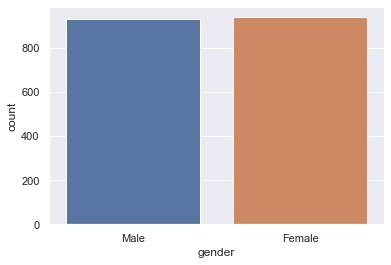

In [21]:
import seaborn as sns
ChurnedYes = churnDataFrame.query("Churn == 'Yes'")
sns.set(style="darkgrid")
ax = sns.countplot(x=ChurnedYes['gender'], data=ChurnedYes['gender'])

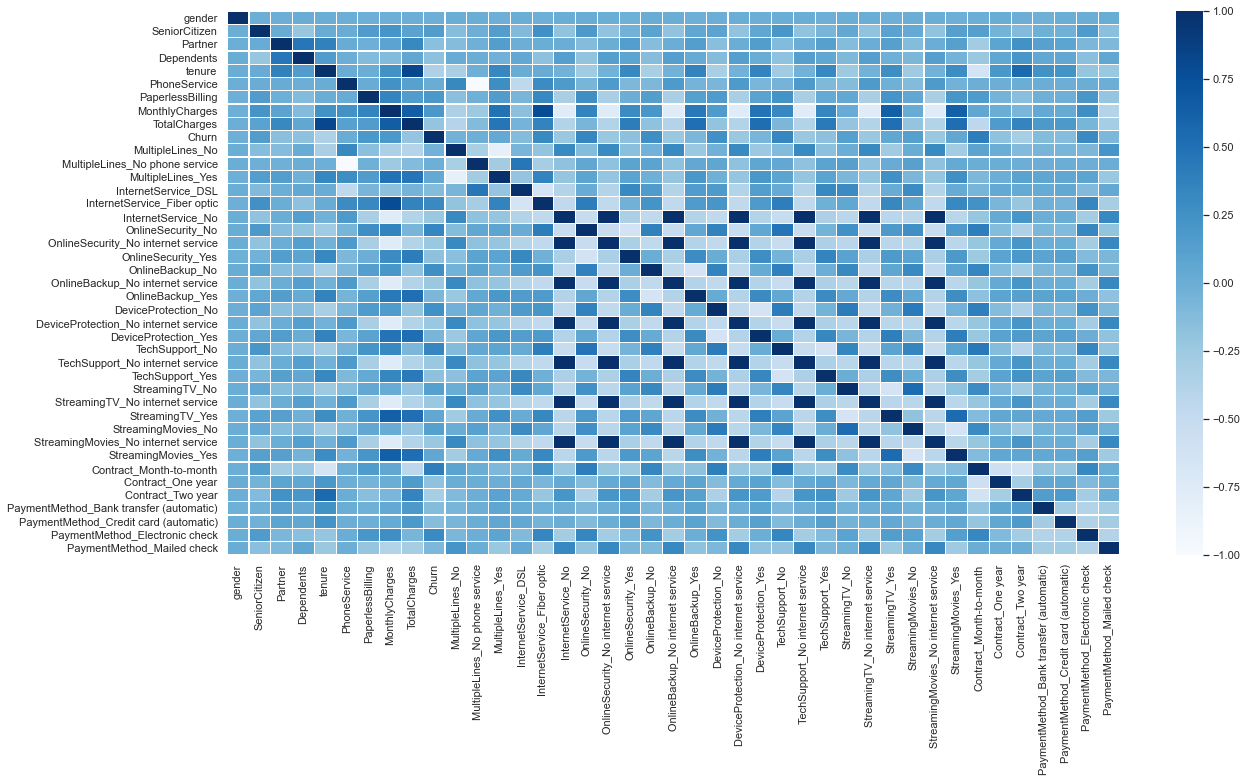

In [22]:
#Correlation matrix shows heavy correlation between lack of services and lack of related services
#We should consider dropping some of these.  
#The darker the shade, the more correalted they are

import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = modelDF.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix,linewidths=.1,ax=ax,cmap='Blues')
plt.show()

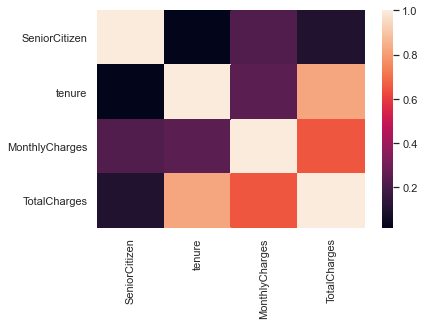

<Figure size 1440x720 with 0 Axes>

In [23]:
#Heatmap of original dataframe is pretty useless.  All variables are low-corr, and only numeric columns are evaluated

import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = churnDataFrame.corr()
sns.heatmap(corrMatrix)
plt.figure(figsize=(20,10))
plt.show()

In [25]:
#As promised, here's the converted dataframe conversion to csv.  
#No idea if importing this will play nicely after boolean export

modelDF=modelDF.to_csv(r'modelDF.csv')